In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 89s 20us/step


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels.shape

(60000,)

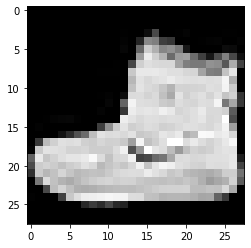

In [7]:
plt.imshow(train_images[0],cmap='gray')

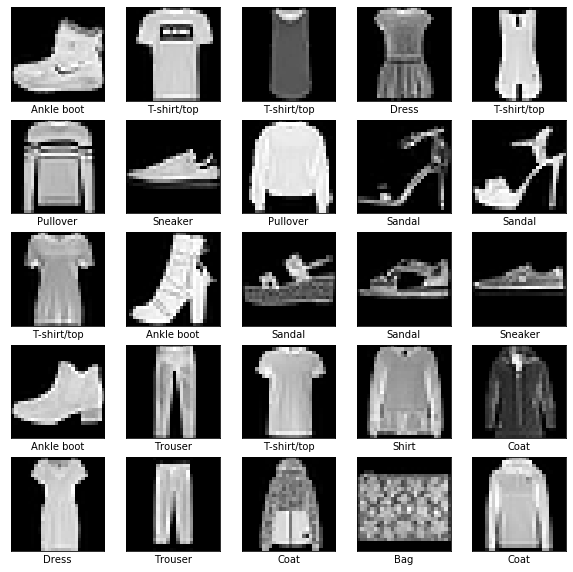

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0

# Build Models
Flatten — transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels).
Dense — These are densely connected, or fully connected, neural layers
Activation — relu activation function at intermediate layers & softmax at last layer
10 — because, 10 class classification has to be done

In [10]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile Model
Loss function —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
Optimizer —This is how the model is updated based on the data it sees and its loss function.
Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2803 - accuracy: 0.8961
Epoch 2/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2687 - accuracy: 0.9000
Epoch 3/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2562 - accuracy: 0.9054
Epoch 4/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2482 - accuracy: 0.9076
Epoch 5/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2377 - accuracy: 0.9108
Epoch 6/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.2306 - accuracy: 0.9139
Epoch 7/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2242 - accuracy: 0.9163
Epoch 8/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.2157 - accuracy: 0.9194
Epoch 9/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2111 - accuracy: 0.9217
Epoch 10/10
60

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 1s 80us/sample - loss: 0.3388 - accuracy: 0.8850

Test accuracy: 0.885


In [15]:
model.predict(test_images[:1])

array([[5.2193017e-11, 2.3034502e-12, 3.3546215e-08, 6.7433364e-11,
        6.9294404e-10, 9.0629887e-04, 1.0235157e-08, 6.6328719e-03,
        5.5909899e-10, 9.9246091e-01]], dtype=float32)

In [16]:
model.predict_classes(test_images[:1])

array([9], dtype=int64)

In [17]:

model.predict_classes(test_images[:1])

array([9], dtype=int64)

In [18]:
test_labels[0]

9

In [19]:
res = model.predict(test_images[:1])

In [20]:
import numpy as np

In [21]:

np.argsort(res)

array([[1, 0, 3, 8, 4, 6, 2, 5, 7, 9]], dtype=int64)

In [22]:

class_names[9]

'Ankle boot'

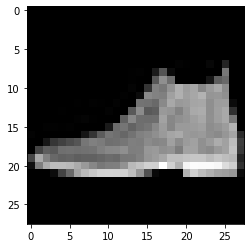

In [23]:
plt.imshow(test_images[0],cmap='gray')